# Assignment 5: Introduction to Convolutional Neural Networks

# Problem Statement

The task at hand involves classifying images of cats and dogs using a Convolutional Neural Network (CNN). We have a dataset containing images of cats and dogs and the objective is to train a CNN model to accurately predict the class of each image.

# Data Preparation

In [1]:
# Organize the dataset into a structured directory format suitable for TensorFlow’s ImageDataGenerator. 
# Split the dataset into training and testing sets.

In [2]:
import splitfolders

In [3]:
input_folder = 'Intellipaat_Cats_Dogs_Dataset/'

In [4]:
splitfolders.ratio(input_folder,output='Intellipaat_Cats_Dogs_Dataset_Split',
                   seed=42, 
                   ratio=(0.7, 0.2, 0.1), 
                   group_prefix=None)

Copying files: 2000 files [00:42, 47.30 files/s]


# Data Augmentation and Preprocessing

In [5]:
# Implement data augmentation techniques to increase the diversity of the training dataset, aiding in the model's ability 
# to generalize.
# Normalize the pixel values of the images for optimal model performance.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             shear_range=0.2,
                             zoom_range=0.2,
                             rotation_range=30,
                             rescale=1/255.0,
                             validation_split=0.2)

In [8]:
batch_size = 20

In [9]:
train_generator = datagen.flow_from_directory("Intellipaat_Cats_Dogs_Dataset_Split/train", 
                                        target_size=(224, 224),      
                                        batch_size = batch_size,
                                        class_mode='binary')

Found 1400 images belonging to 2 classes.


In [10]:
validation_generator = datagen.flow_from_directory("Intellipaat_Cats_Dogs_Dataset_Split/val", 
                                      target_size=(224, 224),      
                                      batch_size = batch_size,
                                      class_mode='binary')

Found 400 images belonging to 2 classes.


In [11]:
import matplotlib.pyplot as plt

Label:  1.0


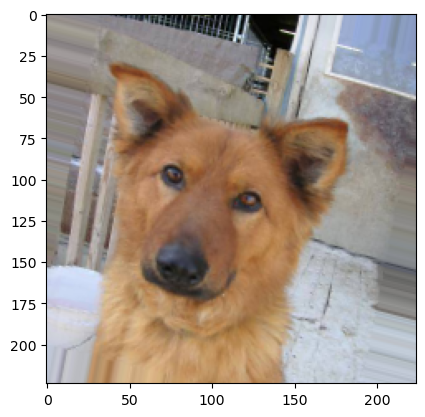

Label:  1.0


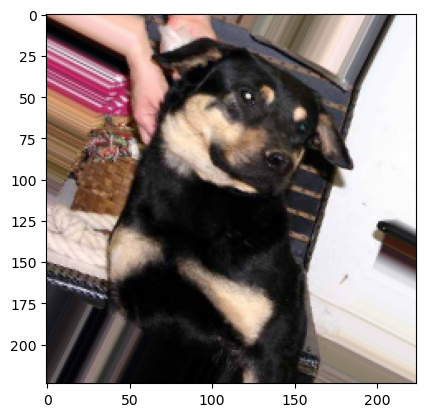

Label:  1.0


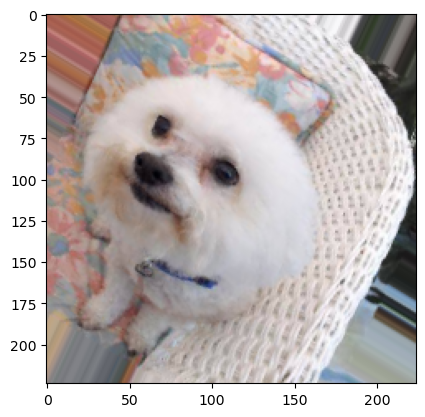

Label:  0.0


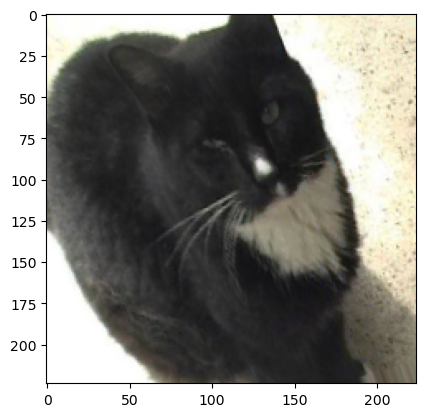

Label:  0.0


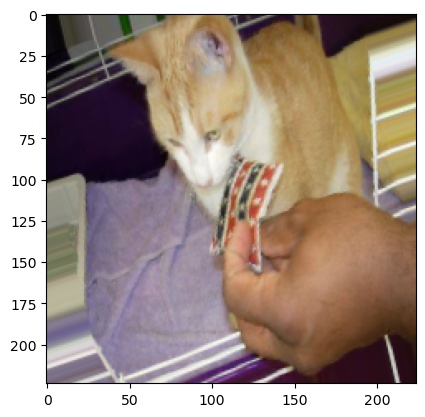

In [12]:
count = 0
for data_batch, labels_batch in train_generator:
    
    img = data_batch[0]
    plt.imshow(img)
    print('Label: ', labels_batch[0])
    plt.pause(3)
    count += 1
    if count == 5:
        break

# Model Building, Training and Evaluation

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, Activation

# Model 1

In [14]:
model_1 = Sequential()
model_1.add(Input(shape=(224,224,3), name='Input'))
model_1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='conv1'))
model_1.add(MaxPooling2D(2, name='pool1'))
model_1.add(Conv2D(filters = 64,kernel_size=(3,3), activation ='relu',name='conv2'))
model_1.add(MaxPooling2D(2, name='pool2'))
model_1.add(Conv2D(filters = 128,kernel_size=(3,3), activation = 'relu',name='conv3'))
model_1.add(MaxPooling2D(2, name='pool3'))
model_1.add(Conv2D(filters = 256,kernel_size=(3,3), activation = 'relu',name='conv4'))
model_1.add(MaxPooling2D(2, name='pool4'))
model_1.add(Flatten(name='flatten'))
model_1.add(Dense(256, activation='relu',name='dense1'))
model_1.add(Dense(1,activation='sigmoid',name='output'))

In [15]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                       │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool1 (MaxPooling2D)                 │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool2 (MaxPooling2D)                 │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3 (Conv2D)                       │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool3 (MaxPooling2D)                 │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv4 (Conv2D)                       │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool4 (MaxPooling2D)                 │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense1 (Dense)                       │ (None, 256)                 │       9,437,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,826,113 (37.48 MB)

 Trainable params: 9,826,113 (37.48 MB)

 Non-trainable params: 0 (0.00 B)

# Model 1 Training

In [16]:
model_1.compile(keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model_1.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20


C:\Users\bhata\AppData\Local\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


70/70 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.5185 - loss: 0.6929 - val_accuracy: 0.5125 - val_loss: 0.6901
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5368 - loss: 0.6910 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.5251 - loss: 0.6898 - val_accuracy: 0.6200 - val_loss: 0.6853
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5514 - loss: 0.6888 - val_accuracy: 0.5000 - val_loss: 0.6895
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.5303 - loss: 0.6873 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5235 - loss: 0.6951 - val_accuracy: 0.6150 - val_loss: 0.6815
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.5679 - loss: 0.6809 - val_accuracy: 0.5525 - val_loss: 0.6803
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.5563 - loss: 0.6842 - val_accuracy: 0.6250 - val_loss: 0.6724
Ep

# Model 1 Evaluation

In [18]:
history = model_1.history.history

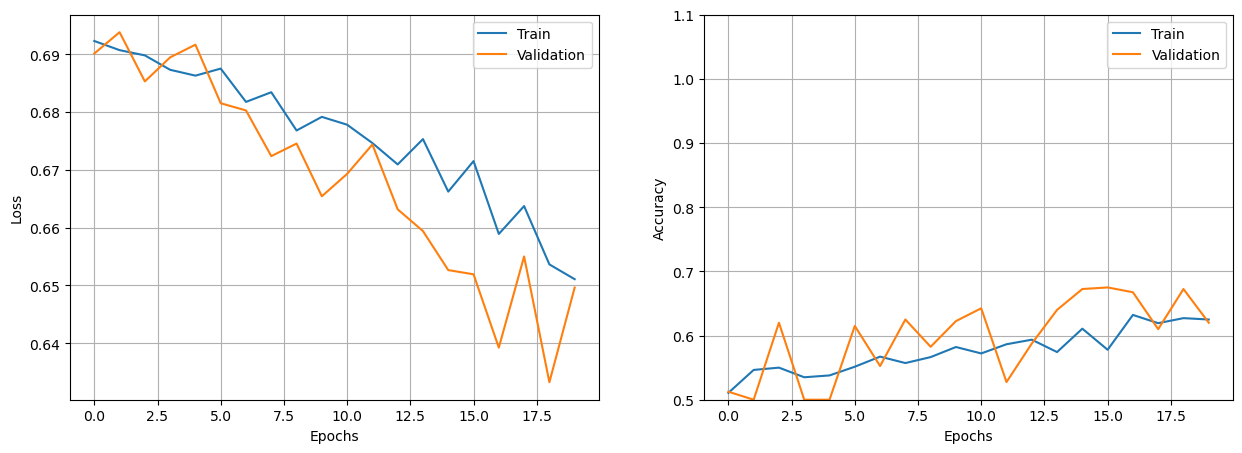

In [19]:
train_loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()


train_acc= history["accuracy"]
val_acc= history["val_accuracy"]

plt.subplot(1,2,2)
plt.plot(train_acc)
plt.plot(val_acc)
plt.ylim(0.5,1.1)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [20]:
# Both training and validation loss show decreasing trend with each epoch as required.
# Accuracy though achieved after 20 epochs is about 60% only and shows very gradual increase in accuracy with each epoch.
# Different optimizer (Adam) can be tried instead of SGD.

# Model 2

In [21]:
model_2 = Sequential()
model_2.add(Input(shape=(224,224,3), name='Input'))
model_2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='conv1'))
model_2.add(MaxPooling2D(2, name='pool1'))
model_2.add(Conv2D(filters = 64,kernel_size=(3,3), activation ='relu',name='conv2'))
model_2.add(MaxPooling2D(2, name='pool2'))
model_2.add(Conv2D(filters = 128,kernel_size=(3,3), activation = 'relu',name='conv3'))
model_2.add(MaxPooling2D(2, name='pool3'))
model_2.add(Conv2D(filters = 256,kernel_size=(3,3), activation = 'relu',name='conv4'))
model_2.add(MaxPooling2D(2, name='pool4'))
model_2.add(Flatten(name='flatten'))
model_2.add(Dense(256, activation='relu',name='dense1'))
model_2.add(Dense(1,activation='sigmoid',name='output'))

# Model 2 Training

In [22]:
model_2.compile(keras.optimizers.Adam(learning_rate = 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model_2.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5221 - loss: 0.6965 - val_accuracy: 0.6675 - val_loss: 0.6816
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5995 - loss: 0.6795 - val_accuracy: 0.5750 - val_loss: 0.6463
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.6087 - loss: 0.6602 - val_accuracy: 0.6575 - val_loss: 0.5979
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.7045 - loss: 0.5776 - val_accuracy: 0.6550 - val_loss: 0.5936
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.6674 - loss: 0.6069 - val_accuracy: 0.7025 - val_loss: 0.5668
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.6788 - loss: 0.5853 - val_accuracy: 0.7075 - val_loss: 0.5497
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.7389 - loss: 0.5447 - val_accuracy: 0.7600 - val_loss: 0.5069
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.7123 - loss: 0.5388 - val_accuracy: 0.7350 - val_loss:

# Model 2 Evaluation

In [24]:
history = model_2.history.history

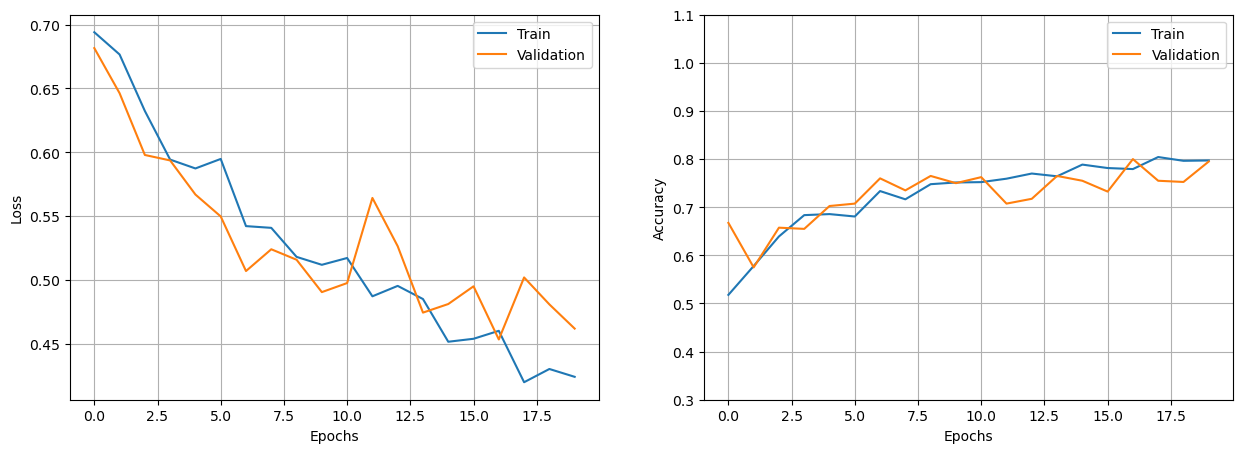

In [25]:
train_loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()


train_acc= history["accuracy"]
val_acc= history["val_accuracy"]

plt.subplot(1,2,2)
plt.plot(train_acc)
plt.plot(val_acc)
plt.ylim(0.3,1.1)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [26]:
## With Adam optimizer higher accuracy of about 80% is achieved as compared to 60% accuracy achieved with SGD model.

In [27]:
## Using this model to perform predicion of batch of images in next steps

# Prediction using a batch of images

In [28]:
path = r'test/'

In [29]:
import os

In [30]:
images = os.listdir(r'test/')
images

['3.jfif', '4.jfif', '5.jfif', '6.jfif', '7.jfif', '8.jfif', '9.jfif']

In [31]:
import cv2

In [32]:
## Importing images and resizing to appropriate size as per model input requirementa

In [33]:
x = []
for image in images:
    img = os.path.join(path,image)
    image_array = cv2.imread(img)
    image_resize = cv2.resize(image_array, (224,224))
    x.append(image_resize)

In [34]:
len = len(x)
len

7

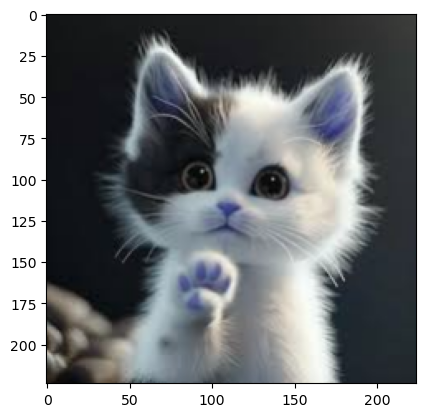

In [35]:
plt.imshow(x[0])

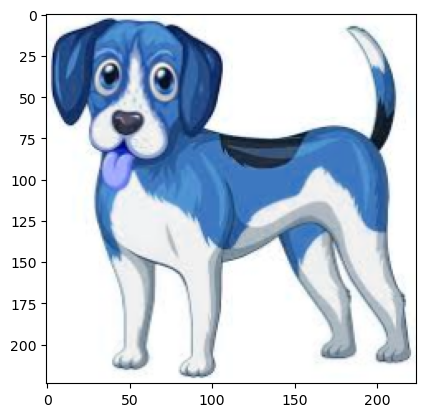

In [36]:
plt.imshow(x[len-1])

In [37]:
import numpy as np

In [38]:
x = np.array(x)

In [39]:
x[2]

array([[[ 35, 134, 114],
        [ 35, 134, 114],
        [ 36, 135, 116],
        ...,
        [ 44, 152, 134],
        [ 44, 152, 133],
        [ 44, 152, 133]],

       [[ 35, 134, 114],
        [ 35, 134, 114],
        [ 37, 135, 115],
        ...,
        [ 44, 152, 134],
        [ 44, 152, 133],
        [ 44, 152, 133]],

       [[ 35, 134, 114],
        [ 35, 134, 114],
        [ 36, 136, 115],
        ...,
        [ 44, 153, 134],
        [ 44, 152, 133],
        [ 44, 152, 133]],

       ...,

       [[ 34, 145, 125],
        [ 34, 145, 125],
        [ 35, 145, 125],
        ...,
        [ 60, 149, 133],
        [ 61, 145, 131],
        [ 56, 139, 126]],

       [[ 34, 145, 125],
        [ 34, 144, 125],
        [ 35, 144, 125],
        ...,
        [ 62, 148, 133],
        [ 64, 144, 131],
        [ 58, 137, 124]],

       [[ 33, 144, 124],
        [ 34, 144, 124],
        [ 35, 143, 124],
        ...,
        [ 63, 147, 133],
        [ 65, 143, 130],
        [ 59, 135, 123]]

In [40]:
## Normalizing pixel values of images for optimal model performance

In [41]:
scaled = x/255

In [42]:
scaled[2]

array([[[0.1372549 , 0.5254902 , 0.44705882],
        [0.1372549 , 0.5254902 , 0.44705882],
        [0.14117647, 0.52941176, 0.45490196],
        ...,
        [0.17254902, 0.59607843, 0.5254902 ],
        [0.17254902, 0.59607843, 0.52156863],
        [0.17254902, 0.59607843, 0.52156863]],

       [[0.1372549 , 0.5254902 , 0.44705882],
        [0.1372549 , 0.5254902 , 0.44705882],
        [0.14509804, 0.52941176, 0.45098039],
        ...,
        [0.17254902, 0.59607843, 0.5254902 ],
        [0.17254902, 0.59607843, 0.52156863],
        [0.17254902, 0.59607843, 0.52156863]],

       [[0.1372549 , 0.5254902 , 0.44705882],
        [0.1372549 , 0.5254902 , 0.44705882],
        [0.14117647, 0.53333333, 0.45098039],
        ...,
        [0.17254902, 0.6       , 0.5254902 ],
        [0.17254902, 0.59607843, 0.52156863],
        [0.17254902, 0.59607843, 0.52156863]],

       ...,

       [[0.13333333, 0.56862745, 0.49019608],
        [0.13333333, 0.56862745, 0.49019608],
        [0.1372549 , 0

In [43]:
img_pred = model_2.predict(scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


In [44]:
img_pred

array([[0.82166636],
       [0.4089978 ],
       [0.28193015],
       [0.78784627],
       [0.9767056 ],
       [0.8007114 ],
       [0.98053145]], dtype=float32)

In [45]:
## Converting predicted values to appropriate class.

y_prediction = []

for value in img_pred:
    if value > 0.5:
        y_prediction.append("Dog")
    else:
        y_prediction.append("Cat")

In [46]:
y_prediction = np.array(y_prediction)

In [47]:
y_prediction

array(['Dog', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog', 'Dog'], dtype='<U3')

Label:  Dog


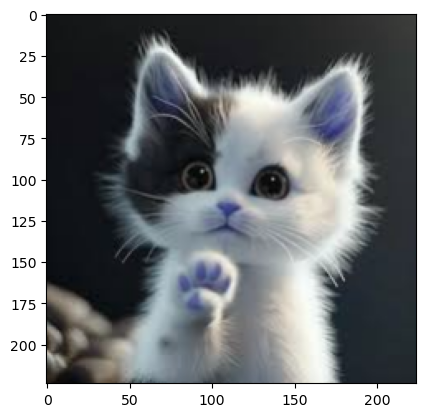

Label:  Cat


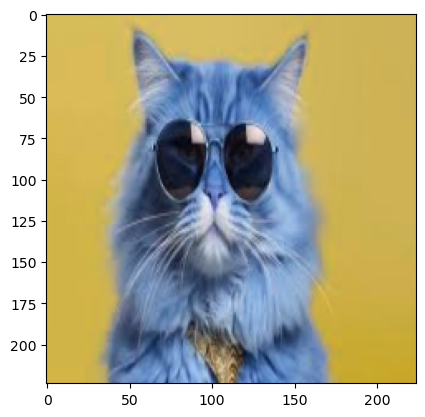

Label:  Cat


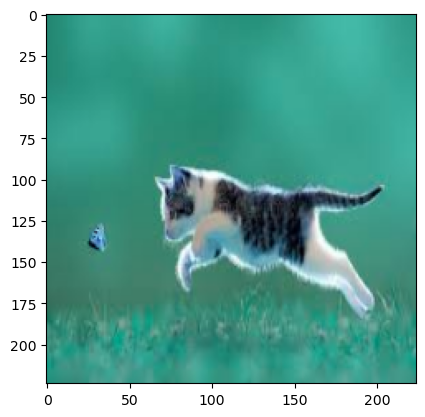

Label:  Dog


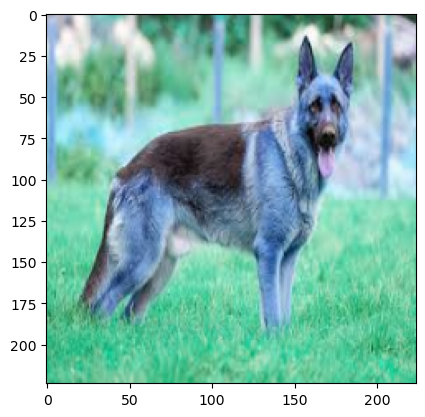

Label:  Dog


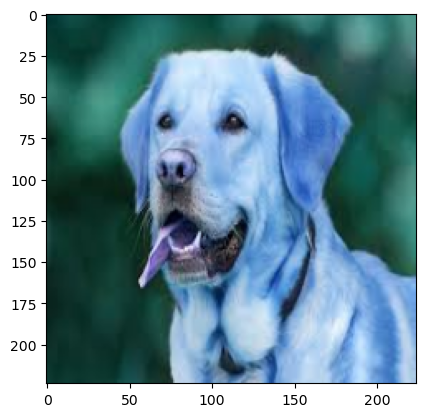

Label:  Dog


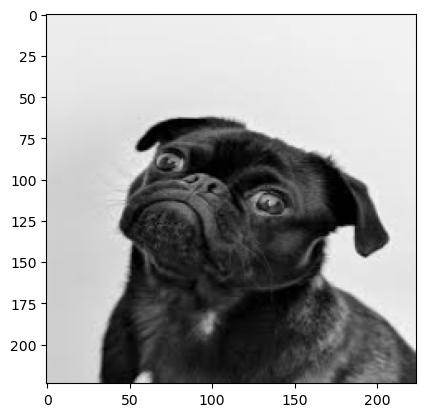

In [48]:
## Plotting images and predicted label for all input images

count = 0
for image in x:
    plt.imshow(image)
    print('Label: ', y_prediction[count])
    plt.pause(3)
    count += 1
    if count == len-1:
        break

In [49]:
## 6 out of 7 predictions are correct. 1 out of 7 is incorrect. Accuracy = 6/7*100 = 86%